In [1]:
import pandas as pd
import xlrd
import numpy as np

In [2]:
df = pd.read_excel('./PNAS_2013.xls')

In [165]:
sources_raw = df['SOURCE'].unique()
sources = [str(i) for i in sources_raw]

dist_num = []
dist_num_log = []
dist_fln = []
dist_fln_log = []

for i in sources:

    sel = df.loc[df['SOURCE'] == i]
    if len(sel) == 0:
        sel = df.loc[df['SOURCE'] == int(i)]

    # weighted distance by neuron target number
    dist_num.append(np.sum((sel['NEURONS'].astype(int)/(sel['NEURONS'].astype(int).sum())) * sel['DISTANCE (mm)']))
    dist_num_log.append(np.sum((np.log(sel['NEURONS'].astype(int))/(np.log(sel['NEURONS'].astype(int)).sum())) * sel['DISTANCE (mm)']))

    # weighted distance by target FLNe 
    dist_fln.append(np.sum((sel['FLNe']/(sel['FLNe'].sum())) * sel['DISTANCE (mm)']))
    dist_fln_log.append(np.sum((np.log(sel['FLNe'])/(np.log(sel['FLNe']).sum())) * sel['DISTANCE (mm)']))


In [146]:
idx = np.argsort(dist_num)
#idx = np.argsort(idx)
np.array(sources)[idx]

array(['Core', 'Gu', '9/46d', '3', 'F6', 'Pi', '14', 'TPt', 'TEa/mp', 'V1',
       'V3A', '9', '24c', 'V4t', '24d', '11', 'F3', 'V2', 'TEO', 'FST',
       '45A', 'V3', 'TEOm', 'F7', 'V4', 'LB', '8r', '32', 'MB', 'F5',
       'PIP', 'TEad', 'SII', '44', '46v', '46d', 'PBc', '7op', 'PBr', '8m',
       'MIP', 'STPi', 'MST', '8l', '45B', 'MT', 'POLE', '1', 'ProM',
       'TEpd', 'F1', '8B', '13', 'VIP', 'AIP', 'TEav', 'F2', 'TEa/ma',
       'V6A', '24b', 'LIP', 'TEpv', '12', 'PGa', 'IPa', '7A', '9/46v',
       'DP', 'PIR', '25', '31', '2', 'F4', 'OPAI', 'OPRO', 'INS', '5',
       '23', 'ENTO', 'V6', '24a', 'PERI', '7B', 'TH/TF', 'STPc', '10',
       '29/30', 'STPr', 'SUB', '7m', 'Pro.St.'], 
      dtype='|S7')

In [147]:
idx = np.argsort(dist_fln)
np.array(sources)[idx]

array(['F6', 'Core', '9/46d', 'Gu', 'V4t', '14', '8r', '3', 'TPt', '24c',
       '8l', 'V1', 'V2', '9', 'LB', '11', '24d', 'TEa/mp', 'F3', 'V3A',
       'AIP', 'F7', '8m', 'TEO', 'V3', '32', 'TEOm', 'Pi', 'SII', '45B',
       '44', 'MB', '46v', 'PIP', 'MST', 'TEad', 'V4', 'FST', '8B', '46d',
       'F5', 'PBc', '45A', 'MT', '1', '24b', 'TEpd', '7op', 'F2', '13',
       'ProM', 'LIP', 'PBr', 'STPi', '9/46v', '12', 'VIP', 'F1', '7A',
       'V6A', 'DP', 'TEav', 'TEa/ma', '24a', 'MIP', 'POLE', '2', 'TEpv',
       'OPAI', 'PIR', '25', 'F4', 'OPRO', '31', 'PGa', '23', 'STPc', 'INS',
       'IPa', 'V6', '5', '7B', '10', '29/30', 'TH/TF', 'ENTO', 'PERI',
       'STPr', '7m', 'SUB', 'Pro.St.'], 
      dtype='|S7')

In [59]:
! ConvertSurface -i_sf Core-Nets_M132LH.midthickness.coord Core-Nets_M132LH.topo -o_fs Core-Nets_M132LH.surf.asc
! mris_convert Core-Nets_M132LH.surf.asc Core-Nets_M132LH.surf

--     Error ConvertSurface (SUMA_ConvertSurface.c:589):
if_name Core-Nets_M132LH.midthickness.coord not found.
MRISreadAsciiFile: could not open file Core-Nets_M132LH.surf.asc
No such file or directory
mris_convert: could not read surface file Core-Nets_M132LH.surf.asc
No such file or directory


In [148]:
import nibabel as nib

In [149]:
a = nib.freesurfer.read_geometry('./M132LH/Core-Nets_M132LH.inflated')
coords = a[0]
faces = a[1]
sulc = nib.freesurfer.read_morph_data('./M132LH/Core-Nets_M132LH.sulc')

In [150]:
% matplotlib inline
from surfdist.viz import viz

In [151]:
areas = pd.read_csv('./M132LH/areas.csv', delimiter=',', header=None)
key = pd.read_csv('./M132LH/key.csv', delimiter=',', header=None)

In [152]:
np.array(key[1])

array(['???', '1', '10', '11', '12', '13', '14', '23', '24a', '24b', '24c',
       '24d', '25', '2', '31', '32', '3', '44', '45A', '45B', '46d', '46v',
       '5', '7A', '7B', '7m', '7op', '8B', '8l', '8m', '8r', '9_46d',
       '9_46v', '9', 'AIP', 'Core', 'DP', 'Ento', 'F1', 'F2', 'F3', 'F4',
       'F5', 'F6', 'F7', 'FST', 'Gu', 'Ins', 'IPa', 'LB', 'LIP', 'MB',
       'MedialWall', 'MIP', 'MST', 'MT', 'OPAI', 'Opro', 'PBc', 'PBr',
       'Peri', 'PGa', 'PIP', 'Pir', 'PO', 'VIP', 'STPr', 'STPi', 'STPc',
       'TPt', 'S2', 'ProM', 'Sub', 'TH/TF', 'TEO', 'V2', 'V3', 'V1', 'V3A',
       'V4', 'V4t', 'V6', 'V6A', 'Pro.', 'TEMPORAL-POLE', 'TEOm',
       'TEa_m-p', 'TEpd', 'TEpv', 'TEa_m-a', 'TEad', 'TEav', '29_30', 'Pi',
       'InvalidIndex_94'], dtype=object)

In [153]:
np.array(sources)

array(['V2', 'V3', 'V3A', 'V4', 'V4t', 'LIP', 'PIP', 'DP', 'STPr', 'STPi',
       'STPc', 'PGa', 'IPa', 'FST', 'MST', 'MT', 'TEO', 'TEOm', 'PERI',
       'TEad', 'TEav', 'TEpd', 'TEpv', 'TEa/ma', 'TEa/mp', 'TH/TF', 'MB',
       'LB', 'PBc', '8l', '8r', 'Core', '7op', 'TPt', 'V1', 'VIP', 'V6A',
       '8m', 'V6', '7A', 'ENTO', 'INS', '9/46d', '45B', '9/46v', '7B',
       'MIP', '5', '7m', 'POLE', 'PBr', 'Pi', '1', '2', '3', '23', '24a',
       '24b', '24d', 'F2', 'F7', 'F5', 'ProM', '46d', '46v', '8B', '45A',
       '44', '11', '12', 'Pro.St.', 'Gu', 'SII', '24c', '29/30', '31',
       '32', 'F1', 'F3', 'F6', 'F4', '10', '9', 'OPRO', 'OPAI', '14', '13',
       'AIP', 'SUB', '25', 'PIR'], 
      dtype='|S7')

In [154]:
notfound = []
for i in sources:
    if any(i == s for s in key[1]):
        a = 1
    else:
        notfound.append(i)
print notfound

['PERI', 'TEa/ma', 'TEa/mp', 'ENTO', 'INS', '9/46d', '9/46v', 'POLE', 'Pro.St.', 'SII', '29/30', 'OPRO', 'SUB', 'PIR']


In [157]:
sources_rev = sources
sources_rev[np.where(['PERI' in s for s in sources])[0]] = 'Peri'
sources_rev[np.where(['TEa/ma' in s for s in sources])[0]] = 'TEa_m-a'
sources_rev[np.where(['TEa/mp' in s for s in sources])[0]] = 'TEa_m-p'
sources_rev[np.where(['ENTO' in s for s in sources])[0]] = 'Ento'
sources_rev[np.where(['INS' in s for s in sources])[0]] = 'Ins'
sources_rev[np.where(['9/46d' in s for s in sources])[0]] = '9_46d'
sources_rev[np.where(['9/46v' in s for s in sources])[0]] = '9_46v'
sources_rev[np.where(['Pro.St.' in s for s in sources])[0]] = 'Pro.'
sources_rev[np.where(['SII' in s for s in sources])[0]] = 'S2'
sources_rev[np.where(['29/30' in s for s in sources])[0]] = '29_30'
sources_rev[np.where(['OPRO' in s for s in sources])[0]] = 'Opro'
sources_rev[np.where(['SUB' in s for s in sources])[0]] = 'Sub'
sources_rev[np.where(['PIR' in s for s in sources])[0]] = 'Pir'
sources_rev[np.where(['POLE' in s for s in sources])[0]] = 'TEMPORAL-POLE'

/Applications/miniconda3/envs/topography/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app
/Applications/miniconda3/envs/topography/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  app.launch_new_instance()
/Applications/miniconda3/envs/topography/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Applications/miniconda3/envs/topography/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Applications/miniconda3/envs/topography/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: converting an array with 

In [158]:
ind = []
for i in sources_rev:
    ind.append(np.where([i == s for s in key[1]])[0])
ind = np.squeeze(ind)
print ind

[75 76 78 79 80 50 62 36 66 67 68 61 48 45 54 55 74 85 60 90 91 87 88 89 86
 73 51 49 58 28 30 35 26 69 77 65 82 29 81 23 37 47 31 19 32 24 53 22 25 84
 59 93  1 13 16  7  8  9 11 39 44 42 71 20 21 27 18 17  3  4 83 46 70 10 92
 14 15 38 40 43 41  2 33 57 56  6  5 34 72 12 63]


In [159]:
stat = np.zeros(len(coords))
for n,i in enumerate(ind):
    stat[np.where(areas[1] == i)[0]] = dist_num[n]

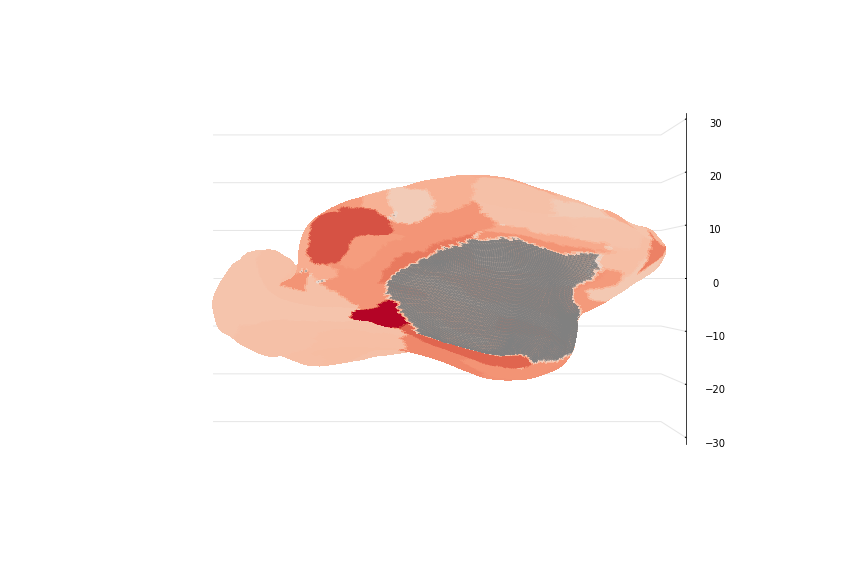

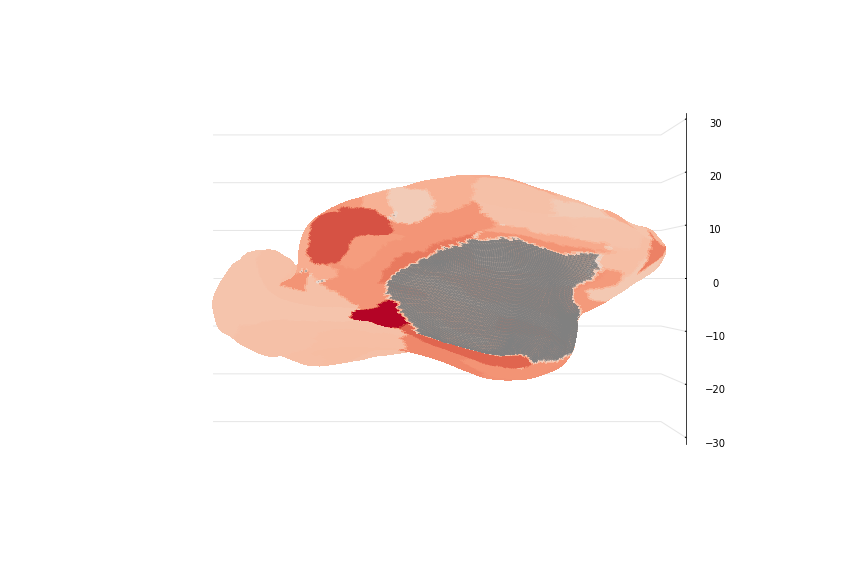

In [514]:
viz(coords, faces, stat_map=stat, cmap='coolwarm', threshold=0.5, azim=180, figsize=(15,10))

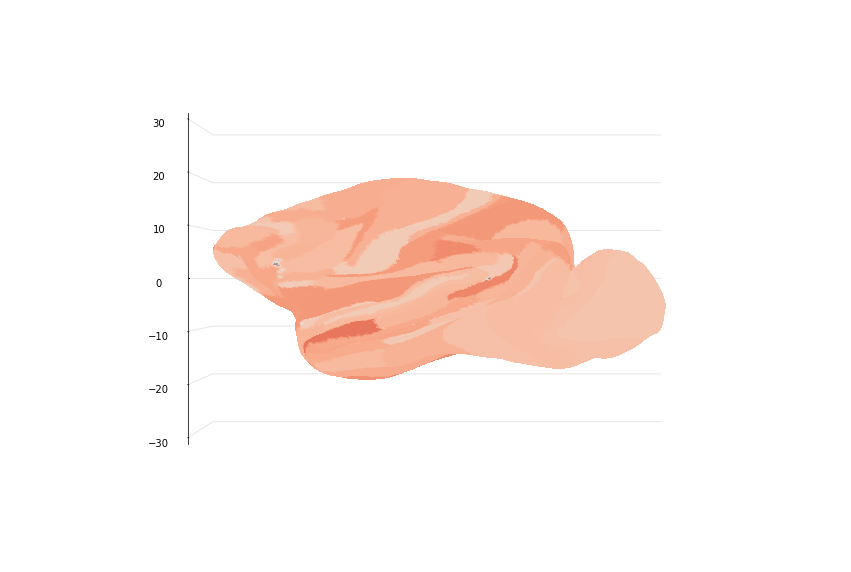

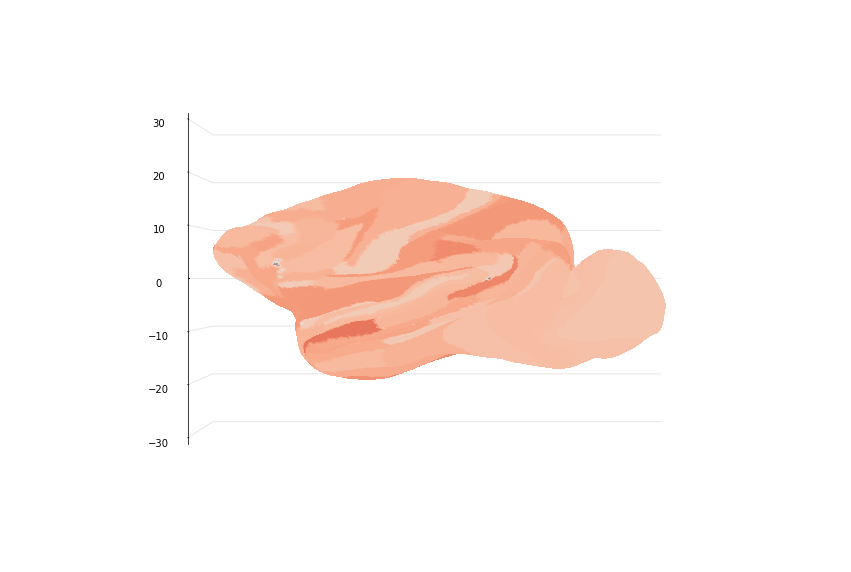

In [515]:
viz(coords, faces, stat_map=stat, cmap='coolwarm', threshold=0.5, azim=0, figsize=(15,10))

In [193]:
stat = np.zeros(len(coords))
for n,i in enumerate(ind):
    stat[np.where(areas[1] == i)[0]] = dist_surf_fln[n]
    
mask = np.where(stat != 0)[0]
stat[mask] = stat[mask]-np.mean(stat[mask])

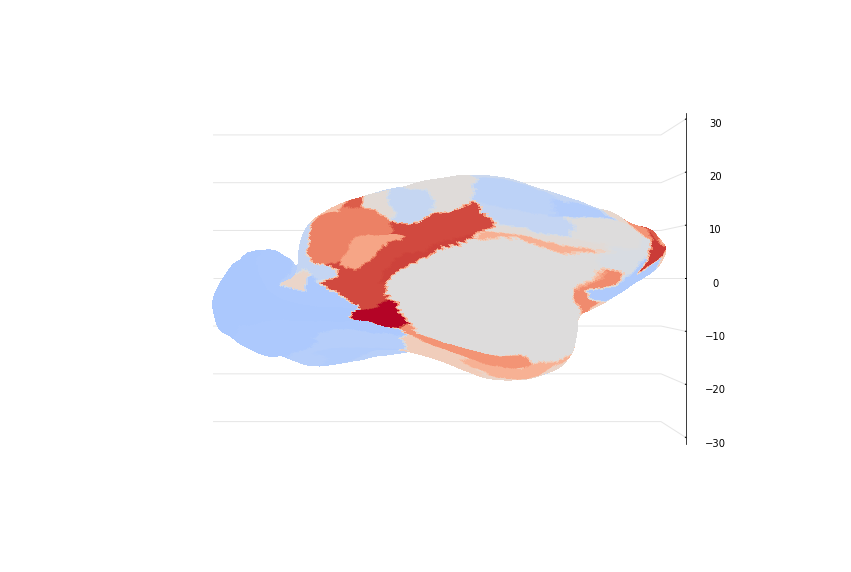

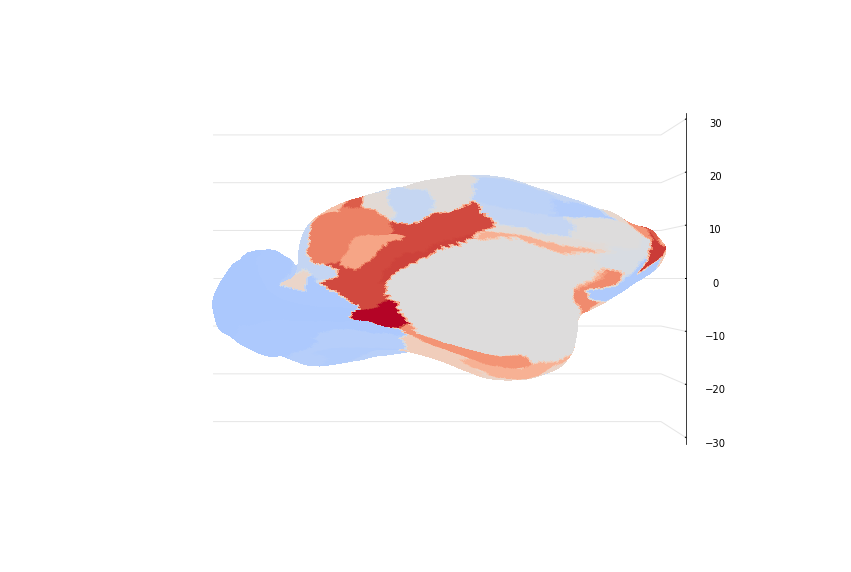

In [194]:
viz(coords, faces, stat_map=stat, cmap='coolwarm', azim=180, figsize=(15,10))#, bg_map=sulc, bg_on_stat=True)

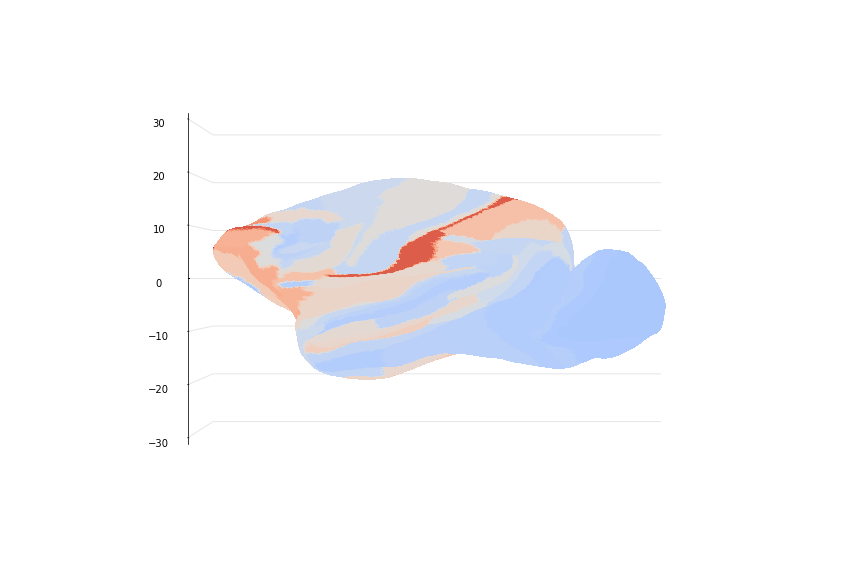

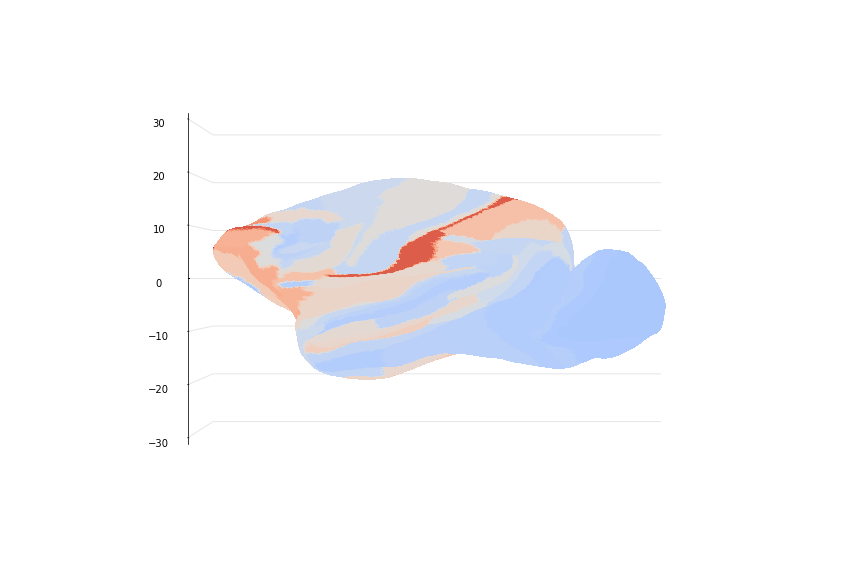

In [195]:
viz(coords, faces, stat_map=stat, cmap='coolwarm', azim=0, figsize=(15,10))#, bg_map=sulc, bg_on_stat=True)

In [70]:
import matplotlib as mpl
import matplotlib.pyplot as plt

(array([ 17.,  26.,  15.,  18.,   8.,   3.,   2.,   1.,   0.,   1.]),
 array([  7.13864501,  10.10838181,  13.0781186 ,  16.04785539,
         19.01759218,  21.98732897,  24.95706577,  27.92680256,
         30.89653935,  33.86627614,  36.83601293]),
 <a list of 10 Patch objects>)

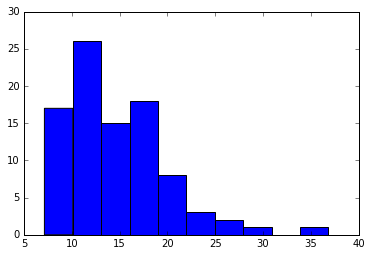

In [71]:
plt.hist(dist_fln)

(array([ 18.,  26.,  20.,  13.,   8.,   3.,   1.,   1.,   0.,   1.]),
 array([  7.49992265,  10.40012727,  13.3003319 ,  16.20053653,
         19.10074115,  22.00094578,  24.90115041,  27.80135503,
         30.70155966,  33.60176429,  36.50196891]),
 <a list of 10 Patch objects>)

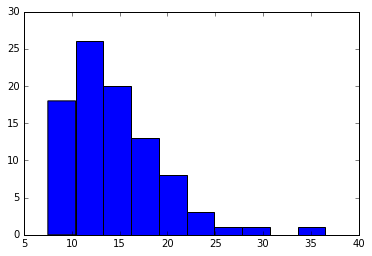

In [72]:
plt.hist(dist_num)

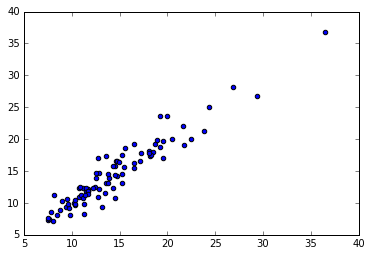

In [73]:
plt.scatter(dist_num,dist_fln)

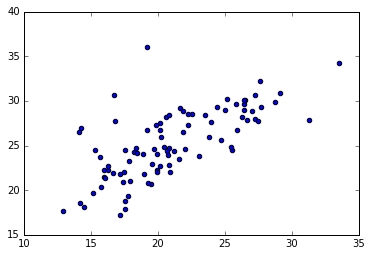

In [74]:
plt.scatter(dist_num_log,dist_fln_log)

In [75]:
prim = ['Core', 'V1', 'F1', '3']

In [76]:
dist = pd.read_excel('./PNAS_2013_DistanceMatrix.xlsx')
dist.fillna(0, inplace=True)

In [77]:
d = [str(i) for i in dist.index]
print d

['V1', 'V2', 'V4', 'MT', '7m', '7A', '7B', '2', 'ProM', 'STPr', 'STPi', 'STPc', 'PBr', 'Tepd', 'TEO', 'F1', '5', 'F2', 'F7', '8B', '10', '46d', '9/46d', '9/46v', '8m', '8l', 'F5', '24c', 'DP', 'V1P', 'V2P', 'V3', 'V3A', 'V4t', 'Pro.St.', '7op', 'LIP', 'VIP', 'MIP', 'PIP', 'AIP', 'V6', 'V6A', 'TPt', 'PGa', 'IPa', 'FST', 'MST', 'TEOm', 'PERIRHINAL', 'TEad', 'TEav', 'TEpv', 'Tea/ma', 'Tea/mp', 'ENTORHINAL', 'TH/TF', 'SUBICULUM', 'TEMPORAL_POLE', 'CORE', 'MB', 'LB', 'PBc', 'INSULA', 'Gu', 'SII', '1', '3', '23', '24a', '24b', '24d', '29/30', '31', '32', 'F3', 'F6', 'F4', '9', '46v', '8r', '45B', '45A', '44', 'OPRO', 'OPAI', '11', '14', '25', '12', '13', 'PIRIFORM', 'Pi']


In [78]:
# find correspondences of sources_rev to dist row labels
notfound = []
for i in sources_rev:
    if any(i == s for s in d):
        a = 1
    else:
        notfound.append(i)
print notfound

['Peri', 'TEpd', 'TEa_m-a', 'TEa_m-p', 'Core', 'Ento', 'Ins', '9_46d', '9_46v', 'TEMPORA', 'Pro.', 'S2', '29_30', 'Opro', 'Sub', 'Pir']


In [79]:
match = ['PERIRHINAL', 'TEpv', 'Tea/ma', 'Tea/mp','CORE', 'ENTORHINAL','INSULA','9/46d','9/46v','TEMPORAL_POLE',
         'Pro.St.', 'SII','29/30','OPRO','SUBICULUM','PIRIFORM']
sources_d = np.copy(sources_rev)
for n,i in enumerate(notfound):
    sources_d[np.where([i == s for s in sources_rev])[0]] = match[n]

In [80]:
d_v = []
for i in sources_d:
    if i.isdigit():
        d1 = np.min((dist['V1'][int(i)], dist['F1'][int(i)]))
    else:
        d1 = np.min((dist['V1'][i], dist['F1'][i]))
    d_v.append(d1)
print d_v

KeyError: 'PERIRHI'

In [81]:
stat = np.zeros(len(coords))
for n,i in enumerate(ind):
    stat[np.where(areas[1] == i)[0]] = dist_fln[n]    

ValueError: Lengths must match to compare

ValueError: x and y must be the same size

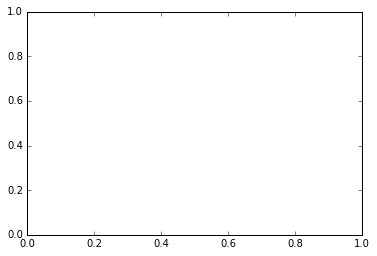

In [82]:
# correlate minimum distance with stat
plt.scatter(dist_num,d_v)
plt.xlabel('conn dist')
plt.ylabel('dist from primary')
plt.show()

In [25]:
np.corrcoef(dist_num,d_v)


array([[ 1.        ,  0.09121227],
       [ 0.09121227,  1.        ]])

In [26]:
np.shape(dist_fln)

(91,)

In [83]:
import surfdist

In [142]:
from surfdist import surfdist, utils
import gdist

In [143]:
cort = np.where(np.array(areas[1]) != np.where([i == 'MedialWall' for i in key[1]])[0])[0]
surf = nib.freesurfer.read_geometry('./M132LH/Core-Nets_M132LH.surf')
vertices, triangles = utils.surf_keep_cortex(surf, cort)

In [535]:
j = sources_rev[0]
src = np.where(np.array(areas[1]) == np.where([i == j for i in key[1]])[0])[0]
src_new = utils.translate_src(src, cort)
data = gdist.compute_gdist(vertices, triangles, source_indices=src_new)
dist_surf = utils.recort(data, surf, cort)
dist_surf[np.where(np.isinf(dist_surf))[0]] = 0

In [ ]:
src = np.where(np.array(areas[1]) == np.where([i == 'V1' for i in key[1]])[0])[0]
src_new = utils.translate_src(src, cort)
data = gdist.compute_gdist(vertices, triangles, source_indices=src_new)
dist_surf_v1 = utils.recort(data, surf, cort)
dist_surf_v1[np.where(np.isinf(dist_surf_v1))[0]] = 0

In [ ]:
src = np.where(np.array(areas[1]) == np.where([i == 'F1' for i in key[1]])[0])[0]
src_new = utils.translate_src(src, cort)
data = gdist.compute_gdist(vertices, triangles, source_indices=src_new)
dist_surf_f1 = utils.recort(data, surf, cort)
dist_surf_f1[np.where(np.isinf(dist_surf_f1))[0]] = 0

In [ ]:
src = np.where(np.array(areas[1]) == np.where([i == 'Core' for i in key[1]])[0])[0]
src_new = utils.translate_src(src, cort)
data = gdist.compute_gdist(vertices, triangles, source_indices=src_new)
dist_surf_a1 = utils.recort(data, surf, cort)
dist_surf_a1[np.where(np.isinf(dist_surf_a1))[0]] = 0

In [ ]:
dist_surf = np.min(np.vstack((dist_surf_f1,dist_surf_v1, dist_surf_a1)), axis = 0)

In [100]:
src = np.where(np.array(areas[1]) == np.where(['V1' == s for s in key[1]])[0])[0]
src_new = utils.translate_src(src, cort)
data = gdist.compute_gdist(vertices, triangles, source_indices=src_new)
ds = utils.recort(data, surf, cort)
ds[np.where(np.isinf(ds))[0]] = 0

0.159483661492


In [105]:
print np.min(ds[np.where(areas[1] == np.int(np.where(['V2' == s for s in key[1]])[0]))[0]])

0.159483661492


In [160]:
ind = []
for i in sources_rev:
    ind.append(np.where([i == s for s in key[1]])[0])
ind = np.squeeze(ind)
print ind

#d_s_min = np.zeros((np.max(ind),np.max(ind)))
d_s = np.zeros((np.max(ind),np.max(ind)))

for n,j in enumerate(ind):
    
    src = np.where(np.array(areas[1]) == j)[0]
    src_new = utils.translate_src(src, cort)
    data = gdist.compute_gdist(vertices, triangles, source_indices=src_new)
    ds = utils.recort(data, surf, cort)
    ds[np.where(np.isinf(ds))[0]] = 0

    for m,k in enumerate(ind):
        d_s[n,m] = np.median(ds[np.where(areas[1] == k)[0]])

    #for m,k in enumerate(ind):
    #    d_s_min[n,m] = np.min(ds[np.where(areas[1] == k)[0]])
    
    print j

[75 76 78 79 80 50 62 36 66 67 68 61 48 45 54 55 74 85 60 90 91 87 88 89 86
 73 51 49 58 28 30 35 26 69 77 65 82 29 81 23 37 47 31 19 32 24 53 22 25 84
 59 93  1 13 16  7  8  9 11 39 44 42 71 20 21 27 18 17  3  4 83 46 70 10 92
 14 15 38 40 43 41  2 33 57 56  6  5 34 72 12 63]
75
76
78
79
80
50
62
36
66
67
68
61
48
45
54
55
74
85
60
90
91
87
88
89
86
73
51
49
58
28
30
35
26
69
77
65
82
29
81
23
37
47
31
19
32
24
53
22
25
84
59
93
1
13
16
7
8
9
11
39
44
42
71
20
21
27
18
17
3
4
83
46
70
10
92
14
15
38
40
43
41
2
33
57
56
6
5
34
72
12
63


In [161]:
np.save('dist_geo_median.npy', d_s)

In [29]:
np.save('dist_geo_min.npy', d_s_min)

NameError: name 'd_s_min' is not defined

In [86]:
d_s_min = np.load('dist_geo_min.npy')
d_s = np.load('dist_geo_median.npy')
print np.shape(d_s_min)

(93, 93)


In [87]:
sources_dict = dict(zip(sources, range(len(sources))))
print sources_dict

{'TEOm': 17, 'ENTO': 40, 'LIP': 5, 'MIP': 46, 'SII': 72, '25': 89, 'TH/TF': 25, '23': 55, 'PERI': 18, 'OPAI': 84, 'PIP': 6, '5': 47, 'PIR': 90, 'IPa': 12, 'F1': 77, '13': 86, '12': 69, '2': 53, 'V6A': 36, 'F5': 61, 'Gu': 71, 'TEpv': 22, '9/46v': 44, 'TEpd': 21, 'VIP': 35, 'TPt': 33, '9/46d': 42, '24d': 58, '24a': 56, '24c': 73, '24b': 57, 'Pi': 51, '3': 54, '8l': 29, '8m': 37, 'V4t': 4, '8r': 30, 'MB': 26, '8B': 65, '32': 76, '31': 75, 'INS': 41, 'MT': 15, 'PBc': 28, 'SUB': 88, '46v': 64, 'V3A': 2, 'POLE': 49, 'FST': 13, '46d': 63, 'Core': 31, 'STPc': 10, 'TEO': 16, 'STPi': 9, 'ProM': 62, 'STPr': 8, 'TEa/mp': 24, 'TEa/ma': 23, '11': 68, '10': 81, 'F2': 59, 'F3': 78, 'F4': 80, '14': 85, 'F6': 79, 'F7': 60, 'PBr': 50, '7op': 32, '45A': 66, '45B': 43, 'PGa': 11, '7m': 48, 'MST': 14, 'AIP': 87, 'DP': 7, 'OPRO': 83, '7B': 45, '7A': 39, '44': 67, '1': 52, 'V1': 34, 'V2': 0, 'V3': 1, 'V4': 3, 'V6': 38, '9': 82, 'Pro.St.': 70, '29/30': 74, 'LB': 27, 'TEav': 20, 'TEad': 19}


In [88]:
df_geo = df.copy()
df_geo = df_geo.replace({'SOURCE': sources_dict})
df_geo = df_geo.replace({'TARGET': sources_dict})
print df_geo

      CASE   MONKEY  SOURCE  TARGET      FLNe  NEURONS STATUS  \
0        1    M81LH       0      34  0.766000    86132  Known   
1        1    M81LH       1      34  0.008260      929  Known   
2        1    M81LH       2      34  0.001450      163  Known   
3        1    M81LH       3      34  0.117000    13171  Known   
4        1    M81LH       4      34  0.001460      164  Known   
5        1    M81LH       5      34  0.001140      128  Known   
6        1    M81LH       6      34  0.000996      112  Known   
7        1    M81LH       7      34  0.000178       20    NFP   
8        1    M81LH       8      34  0.000027        3    NFP   
9        1    M81LH       9      34  0.000534       60  Known   
10       1    M81LH      10      34  0.001250      141  Known   
11       1    M81LH      11      34  0.000694       78  Known   
12       1    M81LH      12      34  0.004520      508    NFP   
13       1    M81LH      13      34  0.004450      500  Known   
14       1    M81LH      

In [89]:
geo_dist = d_s_min[np.array(df_geo['SOURCE']), np.array(df_geo['TARGET'])]
print np.shape(geo_dist)

(1989,)


In [90]:
df['DISTANCE GEO'] = geo_dist
print df

      CASE   MONKEY  SOURCE TARGET      FLNe  NEURONS STATUS  \
0        1    M81LH      V2     V1  0.766000    86132  Known   
1        1    M81LH      V3     V1  0.008260      929  Known   
2        1    M81LH     V3A     V1  0.001450      163  Known   
3        1    M81LH      V4     V1  0.117000    13171  Known   
4        1    M81LH     V4t     V1  0.001460      164  Known   
5        1    M81LH     LIP     V1  0.001140      128  Known   
6        1    M81LH     PIP     V1  0.000996      112  Known   
7        1    M81LH      DP     V1  0.000178       20    NFP   
8        1    M81LH    STPr     V1  0.000027        3    NFP   
9        1    M81LH    STPi     V1  0.000534       60  Known   
10       1    M81LH    STPc     V1  0.001250      141  Known   
11       1    M81LH     PGa     V1  0.000694       78  Known   
12       1    M81LH     IPa     V1  0.004520      508    NFP   
13       1    M81LH     FST     V1  0.004450      500  Known   
14       1    M81LH     MST     V1  0.01

In [162]:
geo_dist = d_s[np.array(df_geo['SOURCE']), np.array(df_geo['TARGET'])]
print np.shape(geo_dist)
df['DISTANCE GEO MEDIAN'] = geo_dist
print df

(1989,)
      CASE   MONKEY  SOURCE TARGET      FLNe  NEURONS STATUS  \
0        1    M81LH      V2     V1  0.766000    86132  Known   
1        1    M81LH      V3     V1  0.008260      929  Known   
2        1    M81LH     V3A     V1  0.001450      163  Known   
3        1    M81LH      V4     V1  0.117000    13171  Known   
4        1    M81LH     V4t     V1  0.001460      164  Known   
5        1    M81LH     LIP     V1  0.001140      128  Known   
6        1    M81LH     PIP     V1  0.000996      112  Known   
7        1    M81LH      DP     V1  0.000178       20    NFP   
8        1    M81LH    STPr     V1  0.000027        3    NFP   
9        1    M81LH    STPi     V1  0.000534       60  Known   
10       1    M81LH    STPc     V1  0.001250      141  Known   
11       1    M81LH     PGa     V1  0.000694       78  Known   
12       1    M81LH     IPa     V1  0.004520      508    NFP   
13       1    M81LH     FST     V1  0.004450      500  Known   
14       1    M81LH     MST     

In [166]:
# translate the distance values based on the target-source combo

dist_surf_num = []
dist_surf_fln = []
dist_surf_num_log = []
dist_surf_fln_log = []

for i in sources:

    sel = df.loc[df['SOURCE'] == i]
    if len(sel) == 0:
        sel = df.loc[df['SOURCE'] == int(i)]

    # weighted distance by neuron target number
    dist_surf_num.append(np.sum((sel['NEURONS'].astype(int)/(sel['NEURONS'].astype(int).sum())) * sel['DISTANCE GEO MEDIAN']))
    dist_surf_num_log.append(np.sum((np.log(sel['NEURONS'].astype(int))/(np.log(sel['NEURONS'].astype(int)).sum())) * sel['DISTANCE GEO MEDIAN']))
    
    # weighted distance by target FLNe 
    dist_surf_fln.append(np.sum((sel['FLNe']/(sel['FLNe'].sum())) * sel['DISTANCE GEO MEDIAN']))
    dist_surf_fln_log.append(np.sum((np.log(sel['FLNe'])/(np.log(sel['FLNe']).sum())) * sel['DISTANCE GEO MEDIAN']))
    

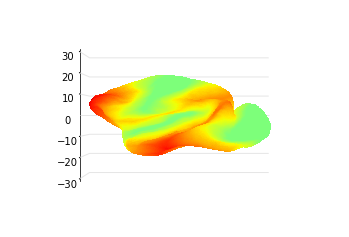

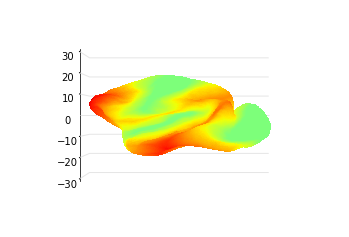

In [541]:
viz(coords, faces, stat_map=dist_surf, cmap='jet')

In [92]:
ind = []
for i in sources_rev:
    ind.append(np.where([i == s for s in key[1]])[0])
ind = np.squeeze(ind)
print ind

d_s = []
for j in ind:
    d_s.append(np.median(dist_surf[np.where(areas[1] == j)[0]]))

[array([75]) array([76]) array([78]) array([79]) array([80]) array([50])
 array([62]) array([36]) array([66]) array([67]) array([68]) array([61])
 array([48]) array([45]) array([54]) array([55]) array([74]) array([85])
 array([60]) array([90]) array([91]) array([87]) array([88]) array([89])
 array([86]) array([73]) array([51]) array([49]) array([58]) array([28])
 array([30]) array([35]) array([26]) array([69]) array([77]) array([65])
 array([82]) array([29]) array([81]) array([23]) array([37]) array([47])
 array([31]) array([19]) array([32]) array([24]) array([53]) array([22])
 array([25]) array([], dtype=int64) array([59]) array([93]) array([1])
 array([13]) array([16]) array([7]) array([8]) array([9]) array([11])
 array([39]) array([44]) array([42]) array([71]) array([20]) array([21])
 array([27]) array([18]) array([17]) array([3]) array([4]) array([83])
 array([46]) array([70]) array([10]) array([92]) array([14]) array([15])
 array([38]) array([40]) array([43]) array([41]) array([2]

NameError: name 'dist_surf' is not defined

In [148]:
d_s_min = []
for j in ind:
    d_s_min.append(np.min(dist_surf[np.where(areas[1] == j)[0]]))

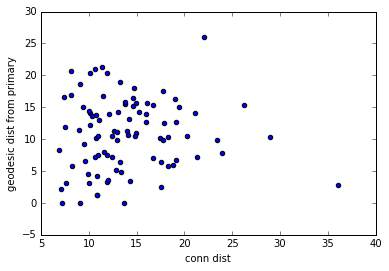

In [549]:
# correlate minimum distance with stat
plt.scatter(dist_num,d_s)
plt.xlabel('conn dist')
plt.ylabel('geodesic dist from primary')
plt.show()

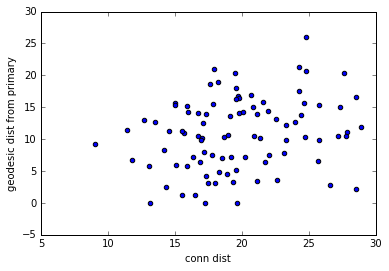

In [153]:
# correlate minimum distance with stat
plt.scatter(dist_surf_fln_log,d_s)
plt.xlabel('conn dist')
plt.ylabel('geodesic dist from primary')
plt.show()

In [151]:
np.corrcoef(dist_surf_num,d_s_min)

array([[ 1.        ,  0.15290019],
       [ 0.15290019,  1.        ]])

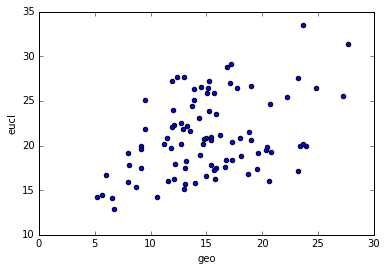

In [144]:
# correlate minimum distance with stat
plt.scatter(dist_surf_num_log,dist_num_log)
plt.xlabel('geo')
plt.ylabel('eucl')
plt.show()

ValueError: x and y must be the same size

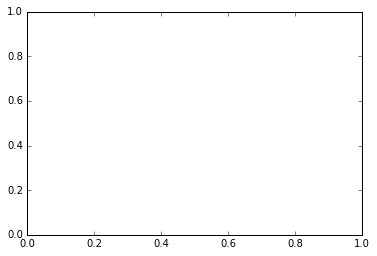

In [145]:
# correlate minimum distance with stat
plt.scatter(dist_num,d_s_min)
plt.xlabel('conn dist')
plt.ylabel('geodesic dist from primary')
plt.show()

In [117]:
targets_raw = df['TARGET'].unique()
targets = [str(i) for i in targets_raw]

dist_t_num = []
dist_t_fln = []

for i in targets:

    sel = df.loc[df['TARGET'] == i]
    if len(sel) == 0:
        sel = df.loc[df['TARGET'] == int(i)]

    # weighted distance by neuron target number
    dist_t_num.append(np.sum((sel['NEURONS'].astype(int)/(sel['NEURONS'].astype(int).sum())) * sel['DISTANCE GEO']))

    # weighted distance by target FLNe 
    dist_t_fln.append(np.sum((sel['FLNe']/(sel['FLNe'].sum())) * sel['DISTANCE GEO']))
    
notfound = []
for i in targets:
    if any(i == s for s in key[1]):
        a = 1
    else:
        notfound.append(i)
print notfound

targets_rev = targets
targets_rev[np.where(['9/46d' in s for s in targets])[0]] = '9_46d'
targets_rev[np.where(['9/46v' in s for s in targets])[0]] = '9_46v'

ind = []
for i in targets_rev:
    ind.append(np.where([i == s for s in key[1]])[0])
ind = np.squeeze(ind)
print ind



['9/46d', '9/46v']
[77 75 79 74 31 42 29 23 36 13 22 24 66 67 68 59 87 10 38 39 44 71 28 32 20
 27  2 55 25]


/Applications/miniconda3/envs/topography/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Applications/miniconda3/envs/topography/lib/python2.7/site-packages/ipykernel/__main__.py:29: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [118]:
sel = df.loc[df['TARGET'] == 'F5']
#print  sel['DISTANCE (mm)']

In [119]:
ix  = np.argsort(dist_num)
print [sources[i] for i in ix]

['Core', 'Gu', '9/46d', '3', 'F6', 'Pi', '14', 'TPt', 'TEa/mp', 'V1', 'V3A', '9', '24c', 'V4t', '24d', '11', 'F3', 'V2', 'TEO', 'FST', '45A', 'V3', 'TEOm', 'F7', 'V4', 'LB', '8r', '32', 'MB', 'F5', 'PIP', 'TEad', 'SII', '44', '46v', '46d', 'PBc', '7op', 'PBr', '8m', 'MIP', 'STPi', 'MST', '8l', '45B', 'MT', 'POLE', '1', 'ProM', 'TEpd', 'F1', '8B', '13', 'VIP', 'AIP', 'TEav', 'F2', 'TEa/ma', 'V6A', '24b', 'LIP', 'TEpv', '12', 'PGa', 'IPa', '7A', '9/46v', 'DP', 'PIR', '25', '31', '2', 'F4', 'OPAI', 'OPRO', 'INS', '5', '23', 'ENTO', 'V6', '24a', 'PERI', '7B', 'TH/TF', 'STPc', '10', '29/30', 'STPr', 'SUB', '7m', 'Pro.St.']


In [120]:
ix  = np.argsort(dist_t_num)
print [targets[i] for i in ix]

['V2', 'V4', 'TEpd', 'MT', 'V1', 'STPi', 'TEO', 'STPc', 'STPr', 'PBr', 'DP', '7B', '8m', 'ProM', 'F1', 'F2', '8l', '24c', '9_46d', 'F5', '7A', '46d', 'F7', '9_46v', '5', '7m', '10', '2', '8B']


In [121]:
### !!! CHECK THE DIRECT COMPARISON OF SOURCE AND TAGRET BASED MAPS.
### AREA 45D APPEARS TO RECEIVE SHORT CONNECTIONS AND PROJECT DISTANT...

In [122]:
stat_tar = np.zeros(len(coords))
for n,i in enumerate(ind):
    stat_tar[np.where(areas[1] == i)[0]] = dist_t_num[n]

stat_sor = np.zeros(len(coords))
for n,i in enumerate(ind):
    stat_sor[np.where(areas[1] == i)[0]] = dist_surf_num[n]
    
stat = stat_sor - stat_tar    

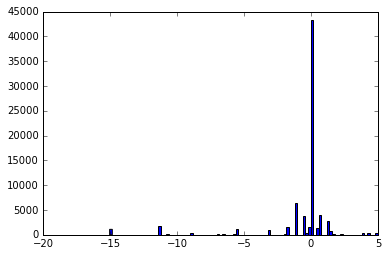

In [125]:
plt.hist(stat, 100)
plt.show()

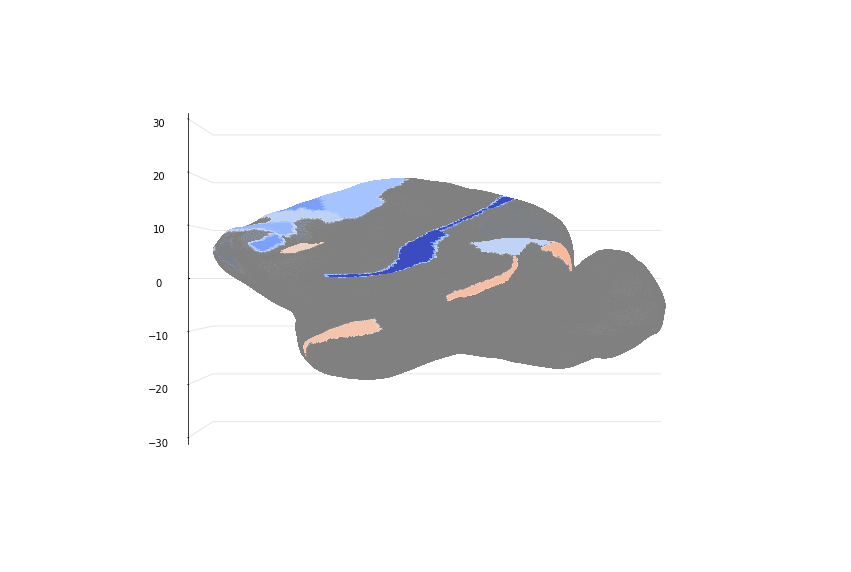

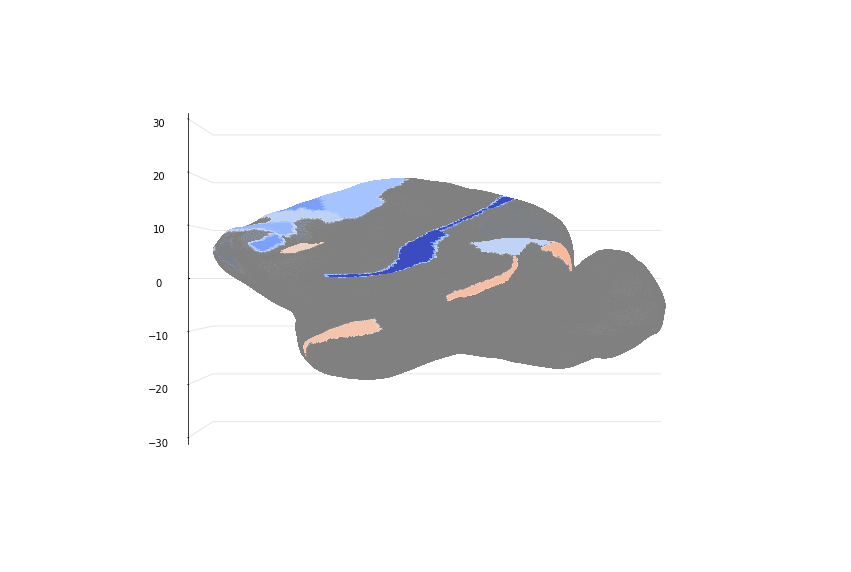

In [126]:
viz(coords, faces, stat_map=stat, cmap='coolwarm', azim=0, threshold=2, figsize=(15,10))

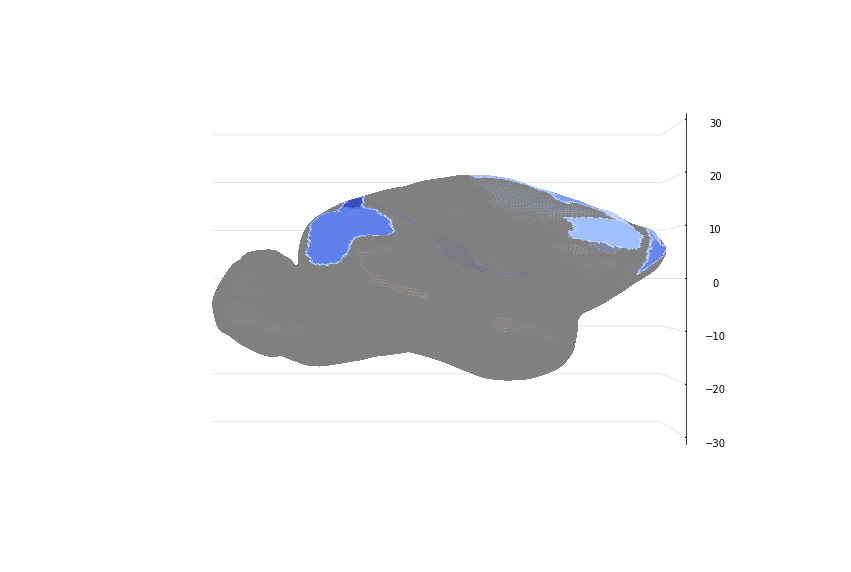

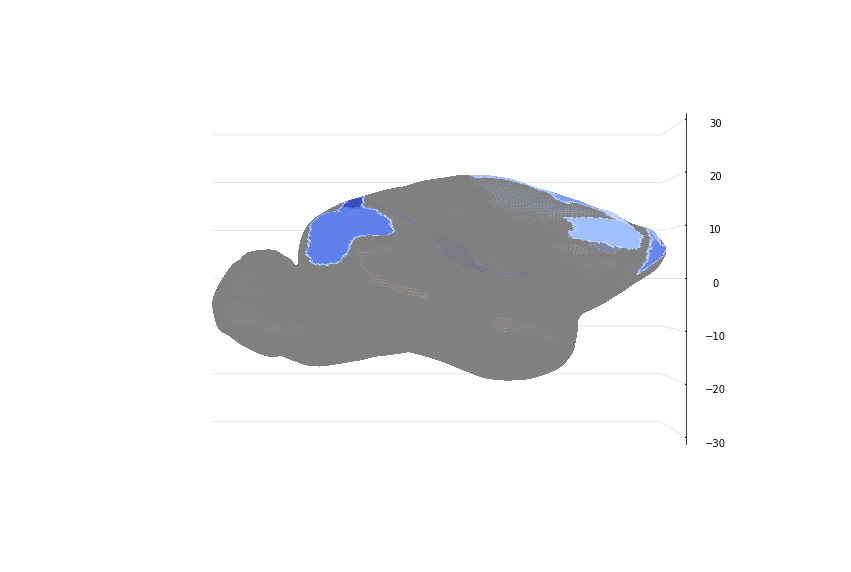

In [127]:
viz(coords, faces, stat_map=stat, cmap='coolwarm', azim=180, threshold=2, figsize=(15,10))

In [167]:
stat_geo = np.zeros(len(coords))
for n,i in enumerate(ind):
    stat_geo[np.where(areas[1] == i)[0]] = dist_surf_num[n]

stat_euc = np.zeros(len(coords))
for n,i in enumerate(ind):
    stat_euc[np.where(areas[1] == i)[0]] = dist_num[n]
    
stat = stat_geo - stat_euc

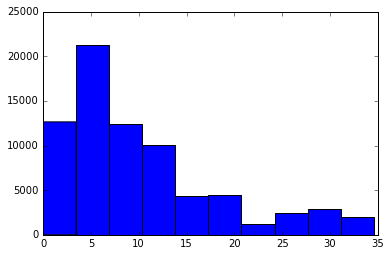

In [168]:
plt.hist(stat_geo)
plt.show()

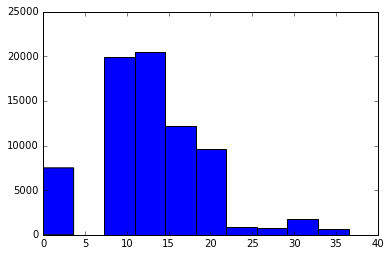

In [169]:
plt.hist(stat_euc)
plt.show()

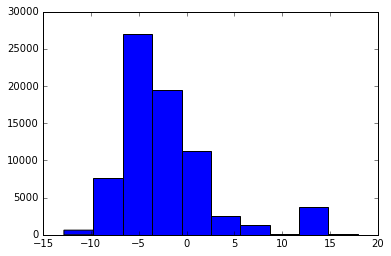

In [172]:
plt.hist(stat)
plt.show()

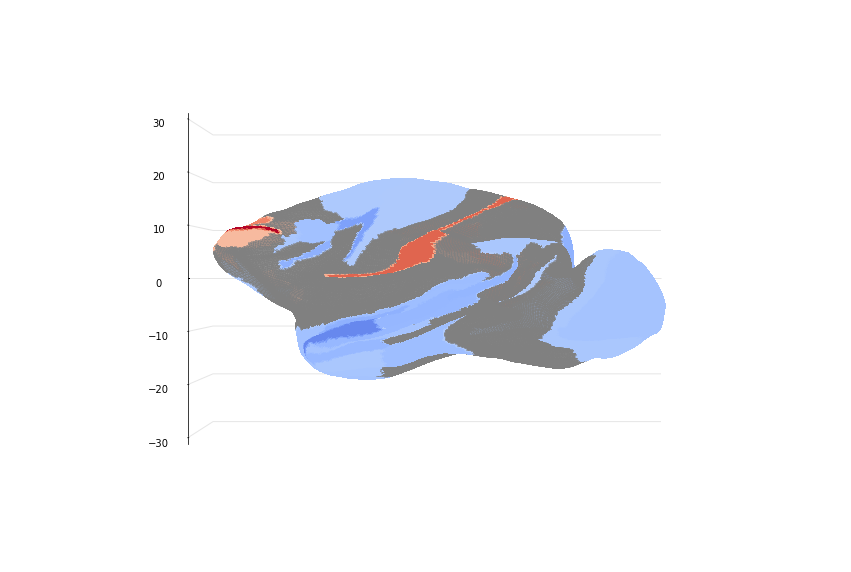

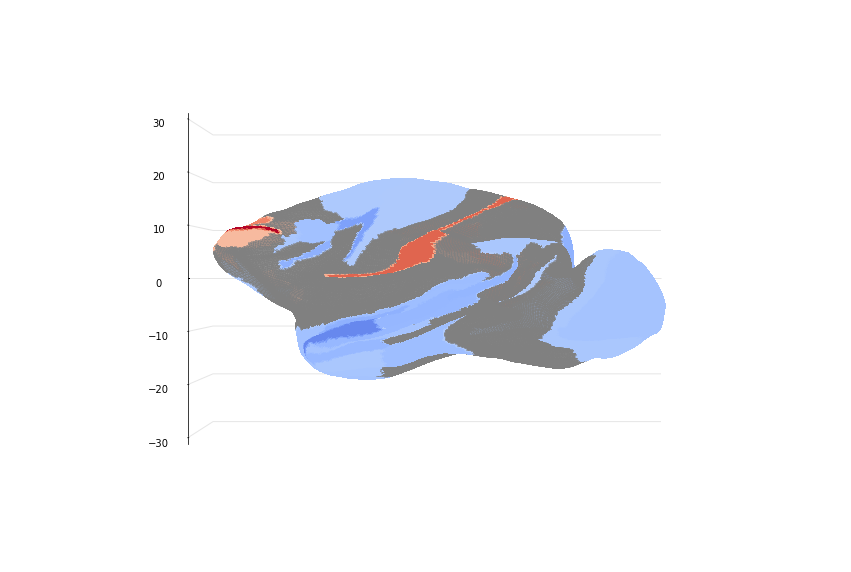

In [173]:
viz(coords, faces, stat_map=stat, cmap='coolwarm', azim=0, threshold=5, figsize=(15,10))

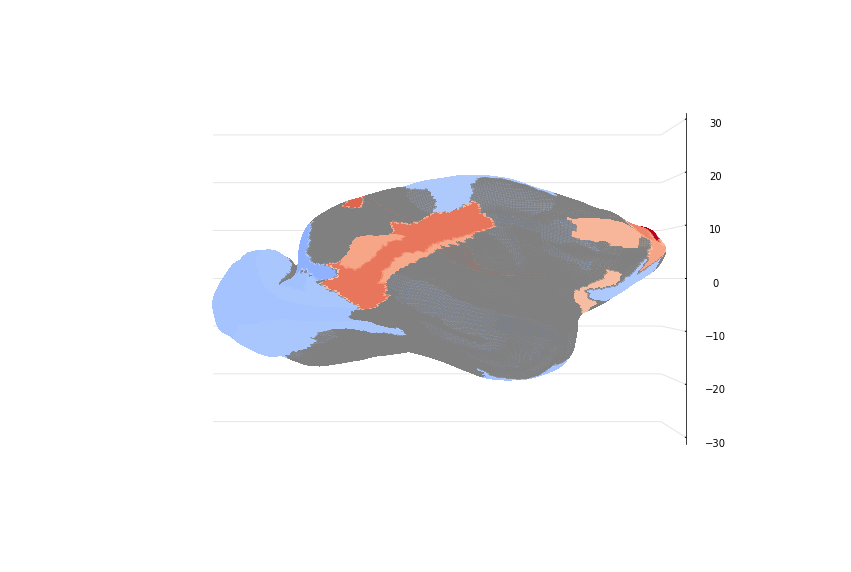

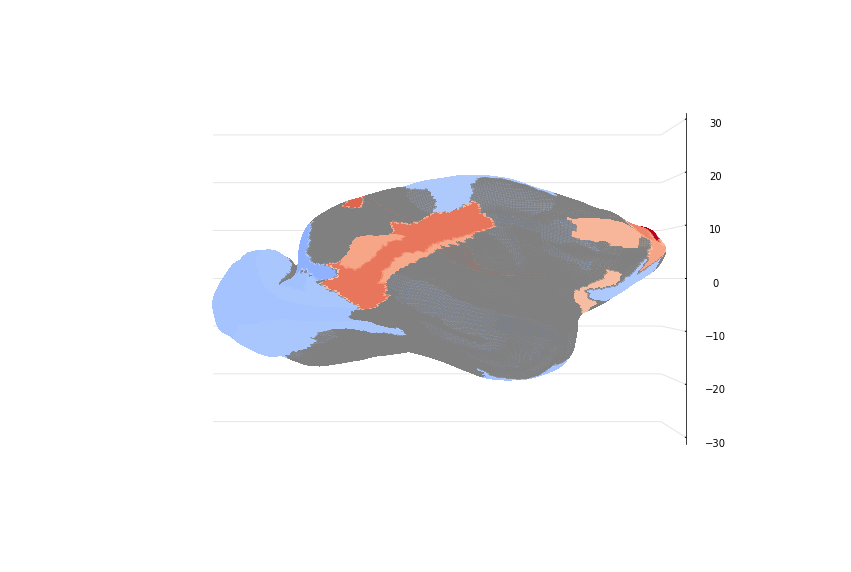

In [174]:
viz(coords, faces, stat_map=stat, cmap='coolwarm', azim=180, threshold=5, figsize=(15,10))

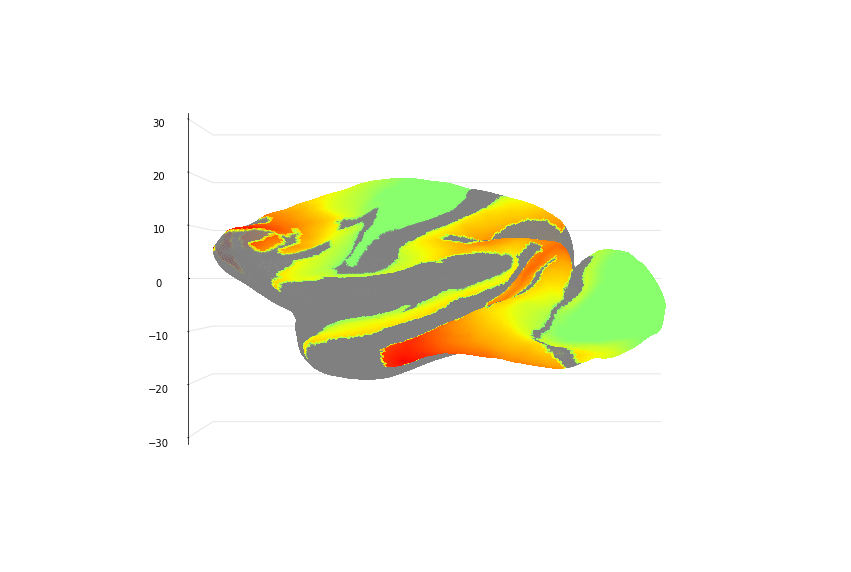

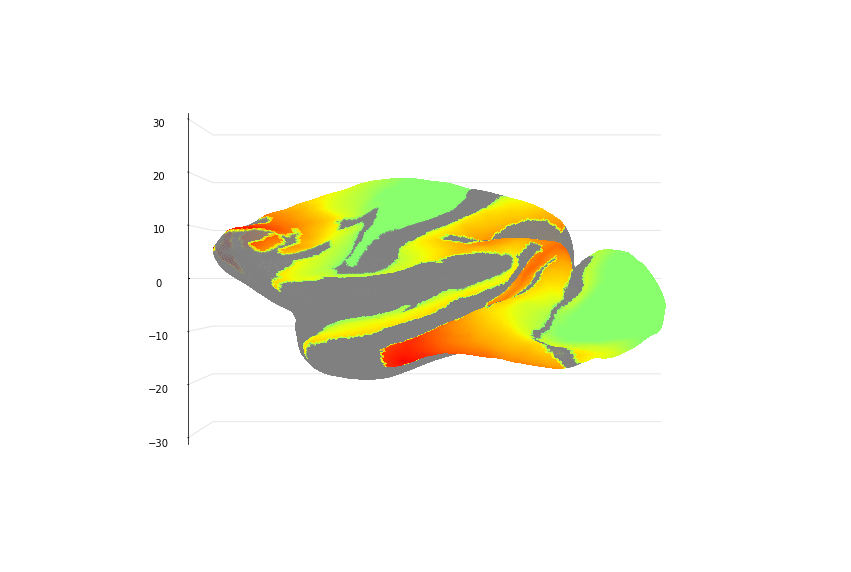

In [556]:
di = dist_surf.copy() + 1.0
di[np.where(stat == 0.0)] = 0.0
viz(coords, faces, stat_map=di, cmap='jet', azim=0, threshold=0.5, figsize=(15,10))

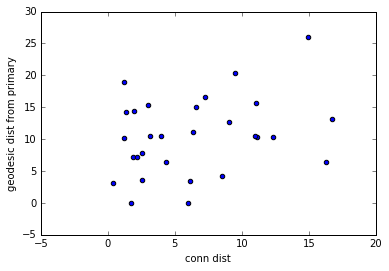

In [203]:
d_s = []
for j in ind:
    d_s.append(np.mean(dist_surf[np.where(areas[1] == j)[0]]))

    # correlate minimum distance with stat
plt.scatter(dist_t_fln,d_s)
plt.xlabel('conn dist')
plt.ylabel('geodesic dist from primary')
plt.show()

In [204]:
np.corrcoef(dist_t_fln,d_s)

array([[ 1.        ,  0.30248819],
       [ 0.30248819,  1.        ]])

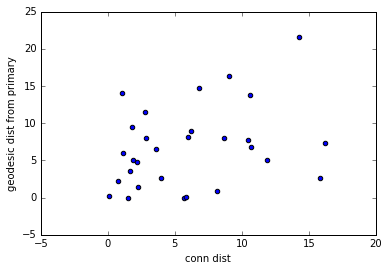

In [205]:
d_s_min = []
for j in ind:
    d_s_min.append(np.min(dist_surf[np.where(areas[1] == j)[0]]))

    # correlate minimum distance with stat
plt.scatter(dist_t_num,d_s_min)
plt.xlabel('conn dist')
plt.ylabel('geodesic dist from primary')
plt.show()

In [179]:
sel = df.loc[df['SOURCE'] == 2]
print np.sum((sel['NEURONS'].astype(int)/(sel['NEURONS'].astype(int).sum())) * sel['DISTANCE GEO'])
sel

27.3049643539


,CASE,MONKEY,SOURCE,TARGET,FLNe,NEURONS,STATUS,BIBLIOGRAPHY,DISTANCE (mm),DISTANCE GEO,DISTANCE GEO MEDIAN
348,11,M119LH,2,TEO,0.000039,6,NFP,NaN,25.9,10.122942,16.554832
410,12,M106LH,2,9/46d,0.000047,12,Known,34,29.1,43.132120,46.745393
481,13,M106RH,2,F5,0.203000,41664,Known,"52, 55",18.6,28.372294,32.187925
561,14,BB272LH,2,8m,0.000049,4,NFP,NaN,21.2,34.573611,39.765630
634,15,BB135LH,2,7A,0.000018,2,Known,60-61,17.9,3.954982,7.653806
767,18,M70LH,2,5,0.036300,1158,Known,"3, 69, 71",17.8,2.741997,8.814407
809,19,M68LH,2,7B,0.003080,232,Known,"3, 18, 60, 74-75",8.7,12.967270,15.419021
981,22,M90RH,2,STPc,0.000069,20,NFP,NaN,22.0,4.960007,9.129198
1137,25,NICO,2,24c,0.002240,162,Known,88,23.6,34.289369,41.436895
1177,26,M69LH,2,F1,0.125000,11148,Known,"3, 50-51, 70, 88, 94-99",13.9,24.599793,29.228062


In [175]:
sel = df.loc[df['TARGET'] == 2]
np.sum((sel['NEURONS'].astype(int)/(sel['NEURONS'].astype(int).sum())) * sel['DISTANCE GEO'])

16.304471013679883